# Render Scans from all .h5 files

Artur Kaczmarczyk  | akaczmarczyk88@gmail.com   
Single Molecule Imaging Group | D. Rueda lab | Imperial College London | MRC LMS

version: August 11 2021

The script below loads all .h5 files from a folder that contains .h5 files with a scan and saves them as .tiff 

-------
requirements: tkinter library for opening dialog window; if there is a problem with it, silence the tkinker library and manually add the directory of the folder with .h5 files



In [2]:
# Load the libraries

import os
import numpy as np
import sys
import matplotlib.pyplot as plt



from lumicks import pylake

from tkinter import filedialog        # for opening dialog window
from tkinter import *


## In the pop-up window, select the folder that contains .h5 files with Kymograph files


In [4]:
## ALTERNATIVELY TYPE THE FOLDER DIRECTORY IF THE POP-UP WINDOW DOESN'T WORK
#folder = os.getcwd( )
#filenames = os.listdir(folder)  
#Filenames = []  
#folder_selected =  r'/Users/Artur/OneDrive - Imperial College London/20200913'


root = Tk()
root.withdraw()
folder_selected = filedialog.askdirectory()
root.update()

filenames = os.listdir(folder_selected)          # all files in the chosen folder
Filenames = []                          


# Selection of KYMOGRAPH.H5 files only
for filename in filenames:              
    if filename[-3:] == '.h5' and 'Scan' in filename:
        
        Filenames.append(filename)
        print(filename)
        
print(type(Filenames))

os.chdir(folder_selected)
os.getcwd()

20200827-154533 Qtrap_test Scan 1.h5
20200827-193923 Qtrap_test Scan 9.h5
20200828-133318 M1_80nM_Rad51_3nM_RFS1RIP1_2nM80nt_Cy3_ssDNA_ Scan 2.h5
20200828-141549 5_DOUBLE_TETHERED__80nM_Rad51_3nM_RFS1RIP1_2nM80nt_Cy3_ssDNA_ Scan 5.h5
20200828-153107 M6_60nM_DUBLE_TETEHR_Rad51_5nM_RFS1RIP1_1_7nM80nt_Cy3_ssDNA_ Scan 8.h5
20200828-153109 M6_60nM_DUBLE_TETEHR_Rad51_5nM_RFS1RIP1_1_7nM80nt_Cy3_ssDNA_ Scan 9.h5
20200828-153115 M6_60nM_DUBLE_TETEHR_Rad51_5nM_RFS1RIP1_1_7nM80nt_Cy3_ssDNA_ Scan 6.h5
20200828-153117 M6_60nM_DUBLE_TETEHR_Rad51_5nM_RFS1RIP1_1_7nM80nt_Cy3_ssDNA_ Scan 7.h5
<class 'list'>


'/Volumes/ELEMENTS/C-TRAP data 2020/Rad51 project/20200827'

## Extract TIFFs from all files in the folder and save them as .TIFF

Scan I.D. = ['1']
Scan I.D. = ['9']
Scan I.D. = ['2']
Scan I.D. = ['5']
Scan I.D. = ['8']
Scan I.D. = ['9']
Scan I.D. = ['6']
Scan I.D. = ['7']


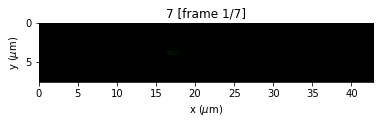

In [5]:
for i in range(len(Filenames)):
   
    name = str(Filenames[i])
    file = pylake.File(name)
    
    print("Scan I.D. = " + str(list(file.scans)))   
    #print(file)                                   # textual representation of the contents of a file

    scans_names = list(file.scans)                 # reference to Kymo I.D 
    scans = file.scans[scans_names[0]]
                              
    
    index = scans_names[0]                        #first index from the list of kymographs within one file    
    #name = 'Kymo_' + index + '.tiff'
    name2 = name[:-3] + '.tiff'

    scans.save_tiff(str(name2))
    scans.plot_rgb(vmax=5)    
    plt.savefig(name[:-3] + '.png', dpi=300, bbox_inches='tight')
    #scans.export_video_rgb(name[:-3]  + '.gif')
